In [0]:
import tensorflow as tf

In [2]:
tf.__version__

'2.2.0-rc2'

In [0]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras import models, layers, optimizers, utils
import numpy as np
import matplotlib.pyplot as plt
#utils for one hot incode

## **Load Dataset**

In [4]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [5]:
len(train_data)

8982

In [6]:
len(test_data)

2246

## **Prepare the data**

data is in the form of indices right now. We have to vectorize it.

In [7]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
one_hot_train_labels = to_one_hot(train_labels)

In [10]:
one_hot_train_labels[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [0]:
from tensorflow.keras.utils import to_categorical
one_hot_test_labels = to_categorical(test_labels)

In [12]:
one_hot_test_labels[10]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [16]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))


Epoch 1/20
16/16 [==============================] - 1s 61ms/step - loss: 2.5348 - accuracy: 0.5244 - val_loss: 1.7291 - val_accuracy: 0.6600
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.3963 - accuracy: 0.7093 - val_loss: 1.3081 - val_accuracy: 0.7090
Epoch 3/20
16/16 [==============================] - 1s 49ms/step - loss: 1.0370 - accuracy: 0.7779 - val_loss: 1.1365 - val_accuracy: 0.7540
Epoch 4/20
16/16 [==============================] - 1s 49ms/step - loss: 0.8059 - accuracy: 0.8267 - val_loss: 1.0265 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.6438 - accuracy: 0.8623 - val_loss: 0.9696 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 1s 49ms/step - loss: 0.5107 - accuracy: 0.8945 - val_loss: 0.9457 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 1s 49ms/step - loss: 0.4162 - accuracy: 0.9139 - val_loss: 0.8892 - val_accuracy: 0.8150
Epoch 8/20
16

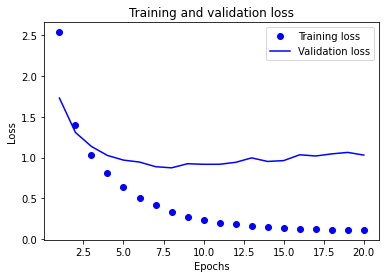

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
predictions = model.predict(x_test)

In [20]:
predictions[0].shape

(46,)

In [21]:
np.sum(predictions[0])

1.0000001

In [22]:
 np.argmax(predictions[0])

3